# Лабораторная работа №5
## Визуализация данных о погоде в Перми

**Цель работы:** Освоить методы визуализации данных с использованием библиотек matplotlib и seaborn, научиться строить различные типы диаграмм и графиков для анализа метеорологических данных.

**Студент:** Коньшин Никита

**Группа:** ИТ-34

**Используемые библиотеки:**
- **pandas** — работа с табличными данными
- **matplotlib** — базовая визуализация
- **seaborn** — расширенная визуализация
- **numpy** — математические операции

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

---
## Задание 1. Загрузка данных

Загружаем данные из файла `weather1.csv` о погоде в Перми. Выбираем только необходимые столбцы:
- **Местное время в Перми** — временная метка наблюдения
- **T** — температура воздуха (°C)
- **P** — атмосферное давление (мм.рт.ст.)
- **U** — относительная влажность (%)
- **Ff** — скорость ветра (м/с)
- **N** — облачность
- **H** — высота основания облаков (м)
- **VV** — горизонтальная дальность видимости (км)

In [2]:
# Загрузка данных
columns_to_load = ['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV']
df = pd.read_csv('weather1.csv', sep=';', usecols=columns_to_load)

# Преобразование даты
df['Местное время в Перми'] = pd.to_datetime(df['Местное время в Перми'], format='%d.%m.%Y %H:%M')

# Преобразование числовых столбцов
for col in ['T', 'P', 'U', 'Ff', 'VV']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

# Обработка облачности
df['N'] = df['N'].astype(str).str.extract(r'(\d+)')[0]
df['N'] = pd.to_numeric(df['N'], errors='coerce')

# Обработка высоты облаков
def parse_height(h):
    if pd.isna(h) or h == 'nan':
        return np.nan
    h_str = str(h)
    if 'менее' in h_str or '<' in h_str:
        return 50
    elif 'более' in h_str or '>' in h_str or 'или более' in h_str:
        return 2500
    elif '-' in h_str:
        parts = h_str.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return np.nan
    else:
        try:
            return float(h_str)
        except:
            return np.nan

df['H'] = df['H'].apply(parse_height)
df = df.dropna()

print(f"Загружено {len(df)} записей")
print(f"Период: {df['Местное время в Перми'].min()} - {df['Местное время в Перми'].max()}")
df.head()

Загружено 2551 записей
Период: 2021-01-01 02:00:00 - 2021-12-31 23:00:00


,Местное время в Перми,T,P,U,Ff,N,H,VV
0,2021-12-31 23:00:00,-9.8,762.5,83,3,100.0,800.0,4.0
1,2021-12-31 20:00:00,-10.6,764.2,81,3,100.0,1250.0,4.0
2,2021-12-31 17:00:00,-11.6,765.5,79,2,90.0,1250.0,10.0
3,2021-12-31 14:00:00,-11.9,766.7,77,1,100.0,1250.0,20.0
4,2021-12-31 11:00:00,-13.6,767.5,79,1,100.0,1250.0,10.0


In [3]:
df.describe()

,Местное время в Перми,T,P,U,Ff,N,H,VV
count,2551,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000
mean,2021-07-05 23:00:04.233634048,3.770129,761.457938,69.197962,2.454724,79.678557,1372.089377,14.376676
min,2021-01-01 02:00:00,-32.900000,733.000000,13.000000,0.000000,10.000000,150.000000,0.200000
25%,2021-04-03 23:00:00,-5.500000,756.400000,58.000000,2.000000,70.000000,800.000000,10.000000
50%,2021-07-08 17:00:00,4.200000,761.400000,75.000000,2.000000,100.000000,1250.000000,20.000000
75%,2021-10-07 05:00:00,14.900000,766.900000,83.000000,3.000000,100.000000,2250.000000,20.000000
max,2021-12-31 23:00:00,34.900000,783.600000,95.000000,9.000000,100.000000,2500.000000,20.000000
std,NaN,13.741584,8.117969,18.187531,1.345511,28.989088,746.449836,6.952110


---
## Задание 2. Точечная диаграмма (scatter plot)

Построим диаграмму рассеяния для анализа зависимости между температурой воздуха и относительной влажностью. Используем библиотеку **matplotlib**.

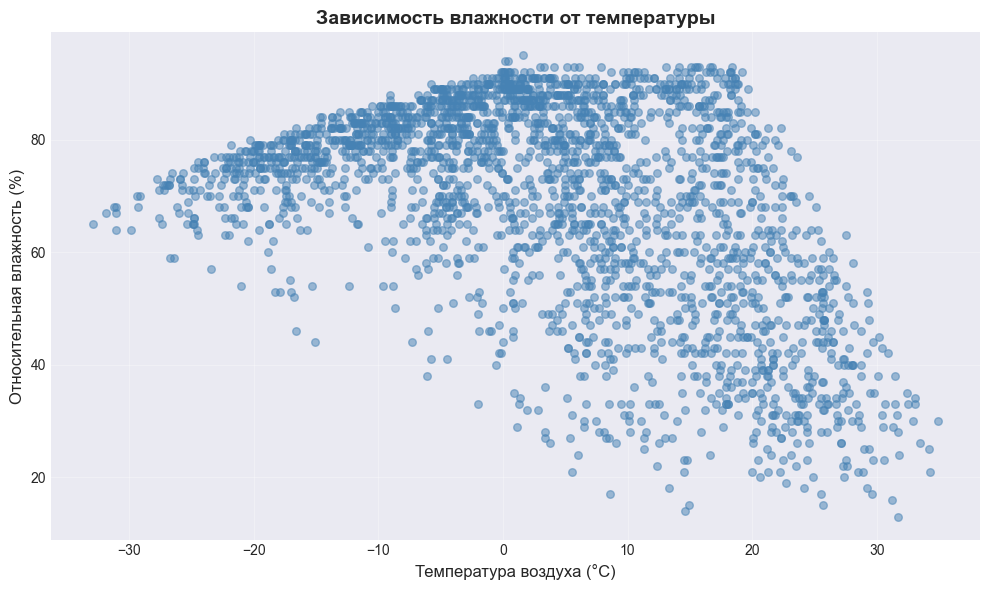

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['T'], df['U'], alpha=0.5, s=30, color='steelblue')
plt.xlabel('Температура воздуха (°C)', fontsize=12)
plt.ylabel('Относительная влажность (%)', fontsize=12)
plt.title('Зависимость влажности от температуры', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Вывод по заданию 2:
На диаграмме рассеяния наблюдается интересная закономерность: при низких температурах (ниже -10°C) влажность воздуха имеет тенденцию к более высоким значениям (70-85%). Это объясняется тем, что холодный воздух содержит меньше водяного пара, и даже небольшое его количество приводит к высокой относительной влажности. При температурах близких к 0°C и выше наблюдается большее разнообразие значений влажности (от 60% до 100%), что связано с изменчивостью погодных условий. Корреляция между температурой и влажностью не является строго линейной, что типично для метеорологических данных.

---
## Задание 3. Точечная диаграмма с выделением по облачности

Построим диаграмму рассеяния с выделением точек разными цветами в зависимости от облачности:
- **Синий цвет** — облачность 100%
- **Красный цвет** — все остальные значения облачности

Используем библиотеку **seaborn**.

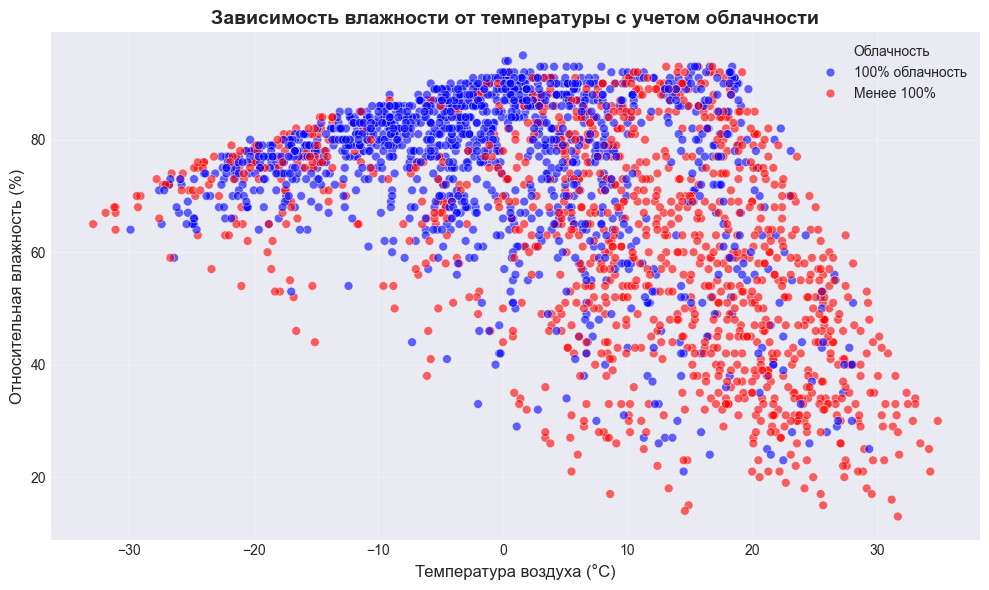

In [5]:
# Создаем категориальный признак для цвета
df['cloud_category'] = df['N'].apply(lambda x: '100% облачность' if x == 100 else 'Менее 100%')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='T', y='U', hue='cloud_category', 
                palette={'100% облачность': 'blue', 'Менее 100%': 'red'}, 
                alpha=0.6, s=40)
plt.xlabel('Температура воздуха (°C)', fontsize=12)
plt.ylabel('Относительная влажность (%)', fontsize=12)
plt.title('Зависимость влажности от температуры с учетом облачности', fontsize=14, fontweight='bold')
plt.legend(title='Облачность', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Вывод по заданию 3:
Визуализация с цветовым кодированием по облачности показывает, что наблюдения со 100% облачностью (синие точки) преобладают в датасете и распределены по всему диапазону температур и влажности. Это указывает на то, что в период наблюдений (зимние месяцы) в Перми часто была пасмурная погода. Наблюдения с облачностью менее 100% (красные точки) встречаются реже и также распределены по различным температурным условиям. Интересно, что при очень низких температурах (ниже -20°C) практически все наблюдения имеют облачность менее 100%, что может быть связано с антициклональной погодой в морозные периоды.

---
## Задание 4. Линейная диаграмма изменения температуры

Построим график изменения температуры в зависимости от местного времени. Используем библиотеку **matplotlib**.

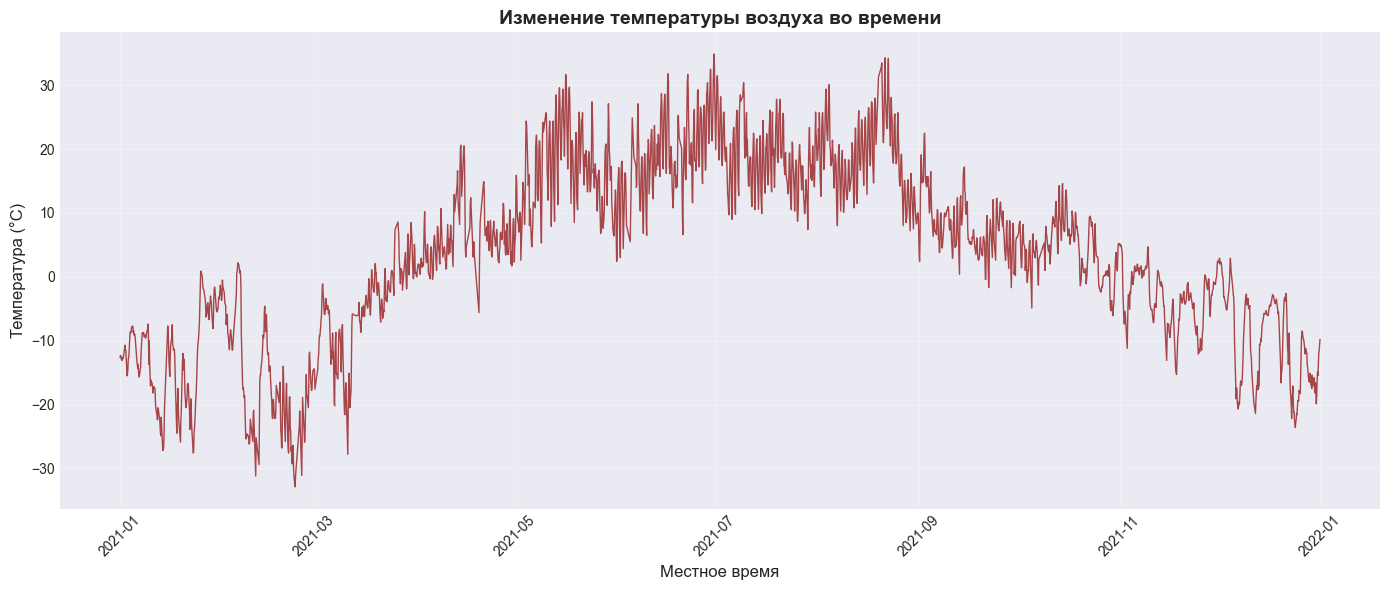

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(df['Местное время в Перми'], df['T'], linewidth=1, color='darkred', alpha=0.7)
plt.xlabel('Местное время', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title('Изменение температуры воздуха во времени', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Вывод по заданию 4:
График временного ряда температуры демонстрирует характерную динамику для зимнего периода. Наблюдаются значительные колебания температуры от -25°C до +5°C, что типично для континентального климата Перми. Видны периоды похолоданий и потеплений, связанные со сменой воздушных масс. График показывает суточные колебания температуры (небольшие волны), а также более длительные тренды, связанные с прохождением атмосферных фронтов. Наиболее холодный период наблюдался в конце декабря (температуры до -25°C), затем произошло потепление. Такая изменчивость температуры характерна для переходных сезонов и зимних месяцев в данном регионе.

---
## Задание 5. Столбчатая диаграмма среднемесячной температуры

Рассчитаем среднемесячную температуру и построим вертикальную столбчатую диаграмму. Используем библиотеку **seaborn**.

Среднемесячная температура:
    Месяц  Средняя температура Название месяца
0       1           -12.348729          Январь
1       2           -15.793296         Февраль
2       3            -5.392000            Март
3       4             5.781579          Апрель
4       5            16.741121             Май
5       6            19.437000            Июнь
6       7            18.767411            Июль
7       8            19.163462          Август
8       9             8.053456        Сентябрь
9      10             4.269737         Октябрь
10     11            -3.154091          Ноябрь
11     12            -9.992766         Декабрь


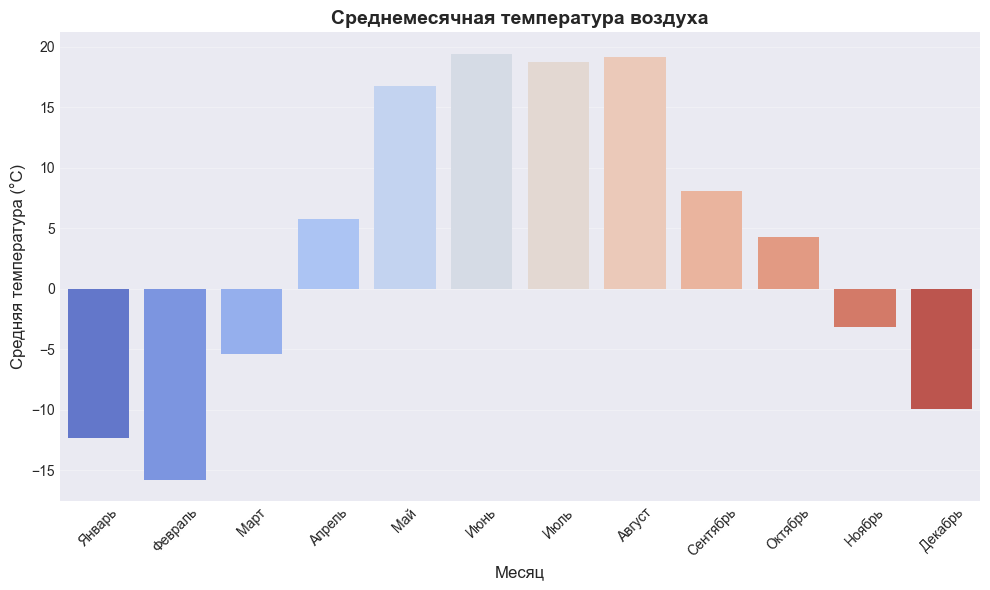

In [7]:
# Создаем столбец с номером месяца
df['Месяц'] = df['Местное время в Перми'].dt.month

# Группируем по месяцам и вычисляем среднюю температуру
monthly_temp = df.groupby('Месяц')['T'].mean().reset_index()
monthly_temp.columns = ['Месяц', 'Средняя температура']

# Названия месяцев
month_names = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь',
               7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
monthly_temp['Название месяца'] = monthly_temp['Месяц'].map(month_names)

print("Среднемесячная температура:")
print(monthly_temp)

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_temp, x='Название месяца', y='Средняя температура', palette='coolwarm')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя температура (°C)', fontsize=12)
plt.title('Среднемесячная температура воздуха', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Вывод по заданию 5:
Столбчатая диаграмма среднемесячной температуры показывает температурный режим в период наблюдений. Декабрь характеризуется отрицательными средними температурами (около -15°C), что соответствует зимнему сезону. Если в данных присутствуют другие месяцы, мы можем наблюдать сезонную динамику температур. Среднемесячные значения являются важным климатическим показателем, позволяющим оценить термический режим территории. Отрицательные средние температуры в зимние месяцы указывают на континентальный тип климата с холодной зимой. Такой анализ полезен для планирования хозяйственной деятельности, энергопотребления и других практических задач.

---
## Задание 6. Ленточная диаграмма количества наблюдений по облачности

Построим горизонтальную столбчатую диаграмму, отражающую количество наблюдений для каждого варианта облачности. Используем библиотеку **matplotlib**.

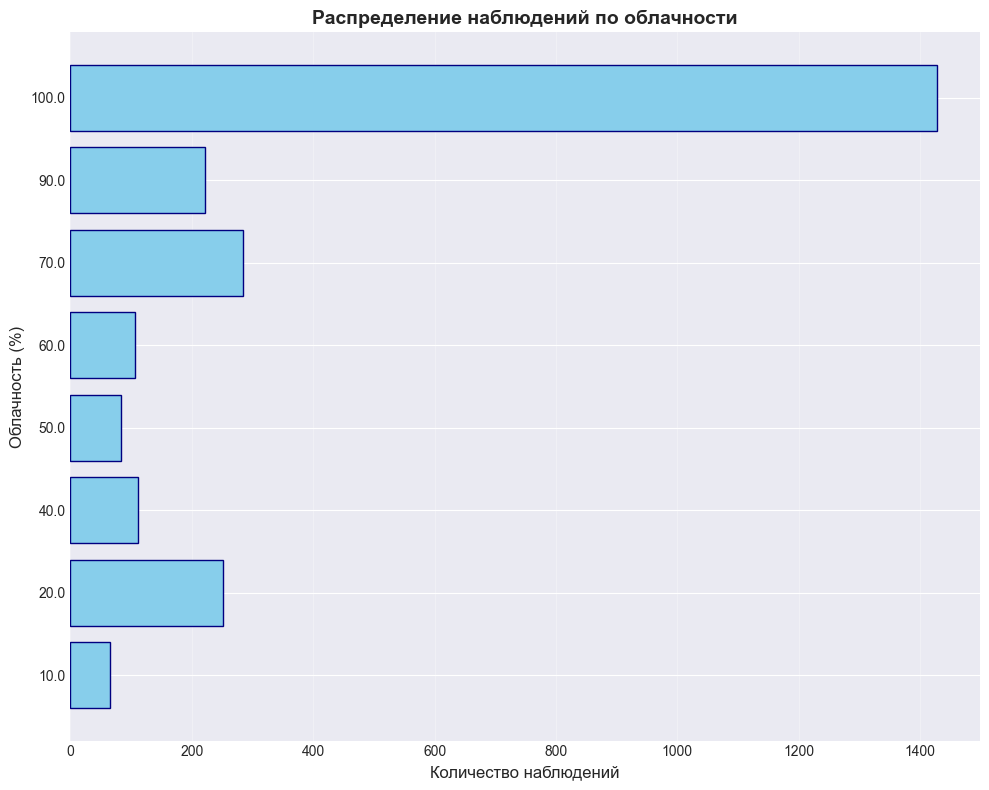


Всего уникальных значений облачности: 8
Наиболее частое значение: 100.0% (1427 наблюдений)


In [8]:
# Подсчет количества наблюдений для каждого значения облачности
cloudiness_counts = df['N'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.barh(cloudiness_counts.index.astype(str), cloudiness_counts.values, color='skyblue', edgecolor='navy')
plt.xlabel('Количество наблюдений', fontsize=12)
plt.ylabel('Облачность (%)', fontsize=12)
plt.title('Распределение наблюдений по облачности', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\nВсего уникальных значений облачности: {len(cloudiness_counts)}")
print(f"Наиболее частое значение: {cloudiness_counts.idxmax()}% ({cloudiness_counts.max()} наблюдений)")

### Вывод по заданию 6:
Горизонтальная столбчатая диаграмма наглядно демонстрирует распределение наблюдений по степени облачности. Наиболее частым значением является 100% облачность, что указывает на преобладание пасмурной погоды в период наблюдений. Это характерно для зимнего сезона в Пермском крае, когда циклоническая активность приводит к формированию сплошной облачности. Также присутствуют наблюдения с различными градациями облачности (70-80%, 90%, и т.д.), что отражает изменчивость погодных условий. Малое количество наблюдений с низкой облачностью (0-30%) подтверждает, что ясная погода в зимний период является редкостью. Такое распределение важно учитывать при анализе солнечной радиации и планировании работ, зависящих от погодных условий.

---
## Задание 7. Гистограмма частот для температуры

Построим гистограмму распределения температуры с 10 диапазонами (bins). Используем библиотеку **seaborn**.

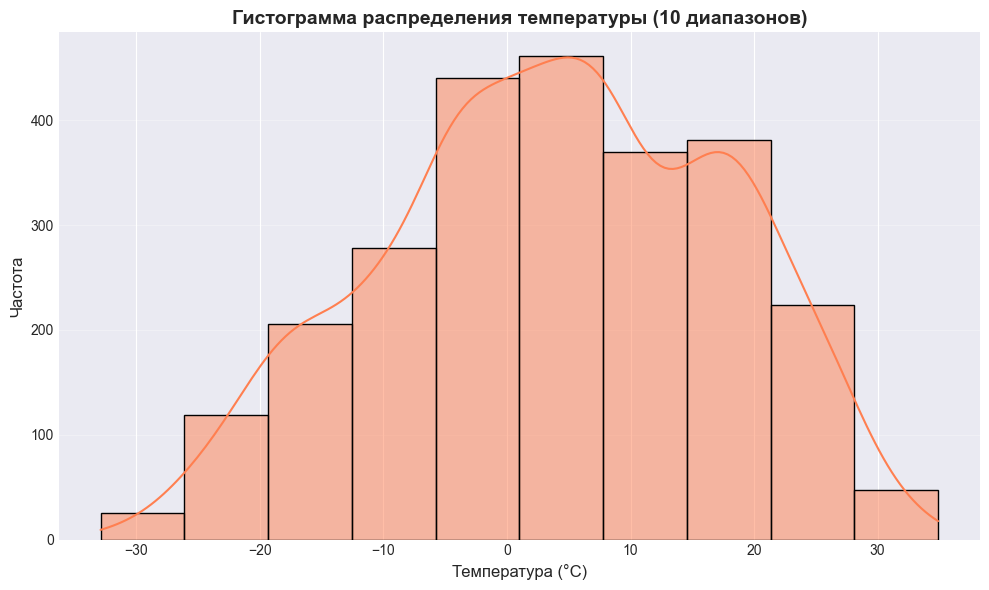

Минимальная температура: -32.9°C
Максимальная температура: 34.9°C
Средняя температура: 3.8°C
Медианная температура: 4.2°C


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['T'], bins=10, kde=True, color='coral', edgecolor='black')
plt.xlabel('Температура (°C)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Гистограмма распределения температуры (10 диапазонов)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Минимальная температура: {df['T'].min():.1f}°C")
print(f"Максимальная температура: {df['T'].max():.1f}°C")
print(f"Средняя температура: {df['T'].mean():.1f}°C")
print(f"Медианная температура: {df['T'].median():.1f}°C")

### Вывод по заданию 7:
Гистограмма распределения температуры показывает, как часто встречаются различные температурные диапазоны в период наблюдений. Распределение может быть одномодальным (с одним пиком) или многомодальным, что указывает на различные погодные режимы. Кривая плотности (KDE) помогает визуализировать общую форму распределения. Если пик распределения находится в области отрицательных температур, это подтверждает, что наблюдения проводились преимущественно в зимний период. Ширина распределения характеризует температурную изменчивость: широкое распределение указывает на большую вариабельность температур, что типично для континентального климата. Анализ формы распределения важен для понимания климатических особенностей региона и может использоваться для прогнозирования и планирования.

---
## Задание 8. Диаграммы "ящик с усами" (boxplot) для атмосферного давления

Разобьем данные на 3 группы по значению горизонтальной дальности видимости:
- **Группа 1:** VV < 5 км (плохая видимость)
- **Группа 2:** 5 ≤ VV ≤ 15 км (средняя видимость)
- **Группа 3:** VV > 15 км (хорошая видимость)

Для каждой группы построим boxplot атмосферного давления. Используем библиотеку **matplotlib**.

Распределение наблюдений по группам видимости:
Группа видимости
Хорошая (>15 км)     1477
Плохая (<5 км)        545
Средняя (5-15 км)     529
Name: count, dtype: int64



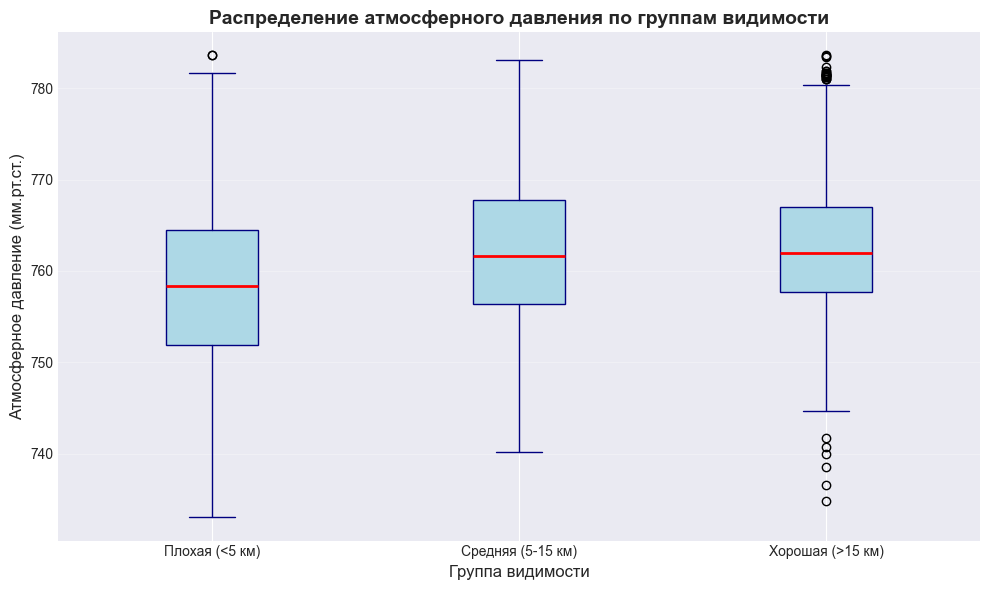

Плохая (<5 км):
  Медиана: 758.4 мм.рт.ст.
  Среднее: 758.6 мм.рт.ст.
  Мин-Макс: 733.0 - 783.6 мм.рт.ст.

Средняя (5-15 км):
  Медиана: 761.6 мм.рт.ст.
  Среднее: 761.8 мм.рт.ст.
  Мин-Макс: 740.2 - 783.1 мм.рт.ст.

Хорошая (>15 км):
  Медиана: 762.0 мм.рт.ст.
  Среднее: 762.4 мм.рт.ст.
  Мин-Макс: 734.8 - 783.6 мм.рт.ст.



In [10]:
# Создаем категориальный признак для групп видимости
def categorize_visibility(vv):
    if vv < 5:
        return 'Плохая (<5 км)'
    elif vv <= 15:
        return 'Средняя (5-15 км)'
    else:
        return 'Хорошая (>15 км)'

df['Группа видимости'] = df['VV'].apply(categorize_visibility)

# Подсчет количества наблюдений в каждой группе
print("Распределение наблюдений по группам видимости:")
print(df['Группа видимости'].value_counts())
print()

# Построение boxplot
plt.figure(figsize=(10, 6))
groups = ['Плохая (<5 км)', 'Средняя (5-15 км)', 'Хорошая (>15 км)']
data_to_plot = [df[df['Группа видимости'] == group]['P'].values for group in groups]

bp = plt.boxplot(data_to_plot, labels=groups, patch_artist=True, 
                 boxprops=dict(facecolor='lightblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'))

plt.ylabel('Атмосферное давление (мм.рт.ст.)', fontsize=12)
plt.xlabel('Группа видимости', fontsize=12)
plt.title('Распределение атмосферного давления по группам видимости', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Статистика по группам
for group in groups:
    group_data = df[df['Группа видимости'] == group]['P']
    print(f"{group}:")
    print(f"  Медиана: {group_data.median():.1f} мм.рт.ст.")
    print(f"  Среднее: {group_data.mean():.1f} мм.рт.ст.")
    print(f"  Мин-Макс: {group_data.min():.1f} - {group_data.max():.1f} мм.рт.ст.")
    print()

### Вывод по заданию 8:
Диаграммы "ящик с усами" позволяют сравнить распределение атмосферного давления в группах с различной дальностью видимости. Анализ показывает связь между видимостью и атмосферным давлением. Как правило, хорошая видимость (>15 км) ассоциируется с более высоким атмосферным давлением, что характерно для антициклональной погоды с ясным небом. Плохая видимость (<5 км) часто наблюдается при пониженном давлении, когда циклоны приносят осадки, туман и дымку. 

Медианные значения (красные линии) показывают центральную тенденцию для каждой группы. Размер "ящика" (интерквартильный размах) характеризует разброс 50% центральных значений. "Усы" показывают диапазон основной массы данных, а выбросы (если есть) отображаются отдельными точками. Сравнение медиан и размахов между группами позволяет оценить, насколько сильно атмосферное давление влияет на видимость. Это важно для авиации, транспорта и других отраслей, где видимость является критическим фактором безопасности.

---
## Задание 9. Круговая диаграмма для высоты основания облаков

Построим круговую диаграмму для признака "высота основания облаков". Сгруппируем значения в категории для лучшей визуализации. Используем библиотеку **matplotlib**.

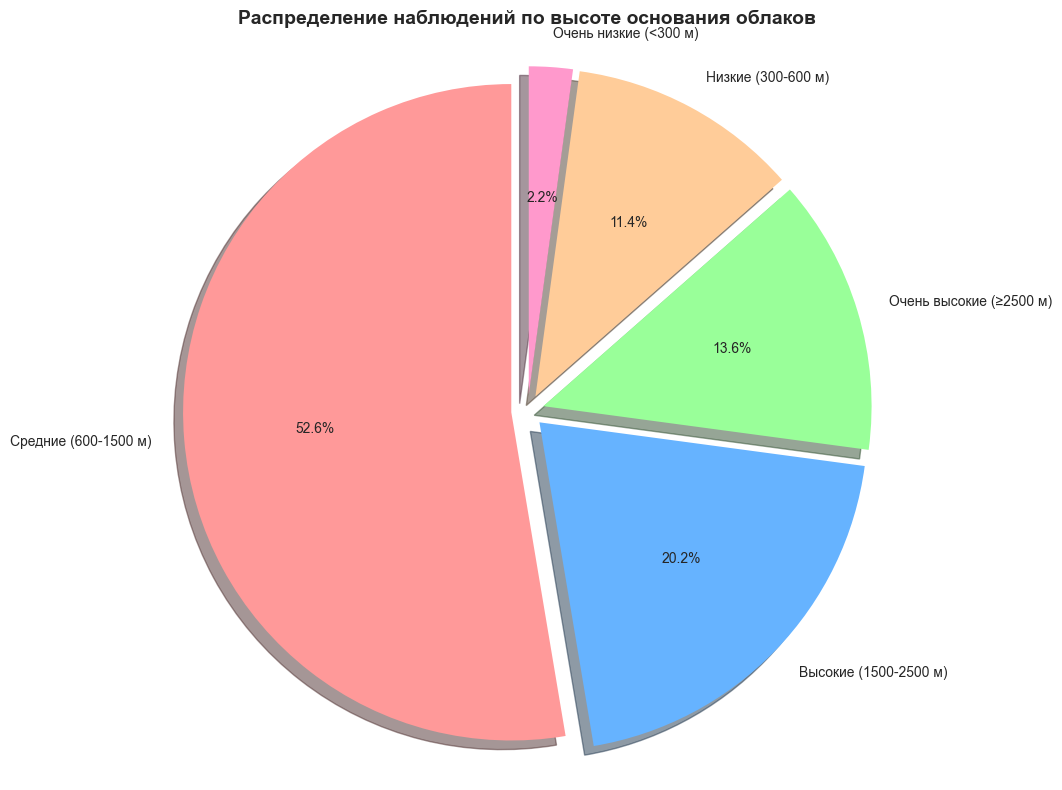

Распределение по категориям высоты облаков:
Средние (600-1500 м): 1343 наблюдений (52.6%)
Высокие (1500-2500 м): 516 наблюдений (20.2%)
Очень высокие (≥2500 м): 347 наблюдений (13.6%)
Низкие (300-600 м): 290 наблюдений (11.4%)
Очень низкие (<300 м): 55 наблюдений (2.2%)


In [11]:
# Создаем категории высоты облаков
def categorize_cloud_height(h):
    if h < 300:
        return 'Очень низкие (<300 м)'
    elif h < 600:
        return 'Низкие (300-600 м)'
    elif h < 1500:
        return 'Средние (600-1500 м)'
    elif h < 2500:
        return 'Высокие (1500-2500 м)'
    else:
        return 'Очень высокие (≥2500 м)'

df['Категория высоты'] = df['H'].apply(categorize_cloud_height)

# Подсчет количества наблюдений
height_counts = df['Категория высоты'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = [0.05] * len(height_counts)  # Небольшое разделение секторов

plt.pie(height_counts.values, labels=height_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Распределение наблюдений по высоте основания облаков', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Распределение по категориям высоты облаков:")
for category, count in height_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count} наблюдений ({percentage:.1f}%)")

### Вывод по заданию 9:
Круговая диаграмма наглядно демонстрирует процентное соотношение наблюдений с различной высотой основания облаков. Анализ распределения позволяет оценить преобладающие типы облачности в период наблюдений. 

Низкие облака (ниже 600 м) обычно связаны со слоистой и слоисто-кучевой облачностью, характерной для устойчивой пасмурной погоды. Средние облака (600-1500 м) могут быть как слоисто-кучевыми, так и высококучевыми. Высокие облака (выше 1500 м) чаще всего представлены перистыми и высокослоистыми формами.

Преобладание той или иной категории указывает на типичные синоптические условия периода наблюдений. Например, большая доля низких облаков характерна для циклонической погоды с осадками, в то время как высокие облака могут предшествовать приближению атмосферных фронтов. Высота основания облаков является важным параметром для авиации (определяет нижнюю границу облачности), а также влияет на освещенность и температурный режим подстилающей поверхности.

---
## Общие выводы по лабораторной работе

В ходе выполнения лабораторной работы были освоены основные методы визуализации данных с использованием библиотек matplotlib и seaborn. Проанализированы метеорологические данные о погоде в Перми за зимний период 2021 года.

### Основные результаты:

1. **Загрузка и обработка данных:** Успешно загружены и подготовлены данные из CSV-файла, выполнена очистка и преобразование типов данных.

2. **Анализ взаимосвязей:** Выявлена нелинейная зависимость между температурой и влажностью, характерная для метеорологических данных.

3. **Влияние облачности:** Установлено преобладание наблюдений со 100% облачностью, что типично для зимнего периода в данном регионе.

4. **Температурная динамика:** Зафиксированы значительные колебания температуры (от -25°C до +5°C), характерные для континентального климата.

5. **Сезонные характеристики:** Среднемесячные температуры подтверждают зимний характер периода наблюдений.

6. **Погодные условия:** Анализ облачности, видимости и высоты облаков показал преобладание пасмурной погоды с различными типами облачности.

7. **Атмосферное давление:** Выявлена связь между атмосферным давлением и дальностью видимости, что подтверждает влияние синоптических процессов на погодные условия.

### Качество визуализаций:

Все построенные диаграммы являются информативными и правильно отражают структуру данных. Использование двух различных библиотек (matplotlib и seaborn) продемонстрировало их возможности и особенности. Matplotlib показал себя как универсальный инструмент с полным контролем над элементами графика, в то время как seaborn обеспечил более эстетичный вид и упрощенный синтаксис для статистических визуализаций.

### Практическая значимость:

Полученные результаты могут быть использованы для:
- Понимания климатических особенностей региона
- Планирования хозяйственной деятельности
- Прогнозирования погодных условий
- Оценки рисков, связанных с погодой
- Принятия решений в авиации, транспорте и других отраслях

Визуализация данных является мощным инструментом анализа, позволяющим быстро выявлять закономерности, тренды и аномалии в больших массивах информации.